# Semana 11: Meta 3.3 Resolver problema Social Ads (Clasificación) usando Regresión Logística.

-   **Primero**. Leer y Analizar la presentación de la Uniddad 3. Analítica de datos, la cual se encuentra en este modulo Presentación Unidad 3.

-   **Segundo**. El alumno debe verificar que tiene instalado el lenguaje de programación Python, algún IDE de su preferencia ya sea PyCharm o Visual Studio Code.

-   **Tercero**. El alumno debe instalar la librería scikitlearn y verificar que tiene disponibles las librerías utilizadas en practicas pasadas.

-   **Cuarto**. Ver el siguiente material acerca del algoritmo y uso de la libreria scikitlearn: 

-   **Quinto**. Descargar el archivo Social Network Ads , es un archivo csv que contiene la edad y el salario estimado de un conjunto de personas potenciales a ser compradores. Cuenta con una columna de 0 ó 1 depende si realizo una compra.

-   **Sexto**. El alumno revisará el siguiente video, siguiendo al video deberá implementar el algoritmo Regresión Logística utilizando los datos del paso anterior para estimar si una persona realizará o no una compra.

-   **Septimo**. El alumno entregará el notebook generado del paso anterior, utilizando los datos del archivo Social Network Ads.

-   **Octavo**. Entregar el archivo notebook , liga a github o liga a google colab en la plataforma BlackBoard.

<FONT style="color:red" SIZE=6 FACE="courier"> 
 Alumno --> Kathia Karely Rivera Rodriguez
</FONT>

In [ ]:
# Alumno --> Kathia Karely Rivera Rodriguez
# Matricula --> 1285290
# Grupo -->  382

# pip install pandas scikit-learn

import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import confusion_matrix, accuracy_score

# Cargar el archivo CSV
data = pd.read_csv("Social_Network_Ads.csv")

# Mostrar las primeras filas del DataFrame
data.head()


,Age,EstimatedSalary,Purchased
0,19,19000,0
1,35,20000,0
2,26,43000,0
3,27,57000,0
4,19,76000,0


In [4]:
# Seleccionar las características usando los nombres de las columnas
X = data[["Age", "EstimatedSalary"]].values
y = data["Purchased"].values

# Dividir los datos en entrenamiento y prueba
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=0)

# Escalar las características
sc = StandardScaler()
X_train = sc.fit_transform(X_train)
X_test = sc.transform(X_test)

# Mostrar las primeras filas del DataFrame para verificar la estructura
print(data.head())

# Mostrar los nombres de las columnas
print(data.columns)


   Age  EstimatedSalary  Purchased
0   19            19000          0
1   35            20000          0
2   26            43000          0
3   27            57000          0
4   19            76000          0
Index(['Age', 'EstimatedSalary', 'Purchased'], dtype='object')


In [5]:
# Crear y entrenar el modelo
classifier = LogisticRegression(random_state=0)
classifier.fit(X_train, y_train)


LogisticRegression(random_state=0)

In [6]:
# Predecir los resultados del conjunto de prueba
y_pred = classifier.predict(X_test)

# Evaluar el rendimiento del modelo
cm = confusion_matrix(y_test, y_pred)
accuracy = accuracy_score(y_test, y_pred)

print("Matriz de Confusión:")
print(cm)
print(f"Precisión del modelo: {accuracy * 100:.2f}%")

Matriz de Confusión:
[[65  3]
 [ 8 24]]
Precisión del modelo: 89.00%


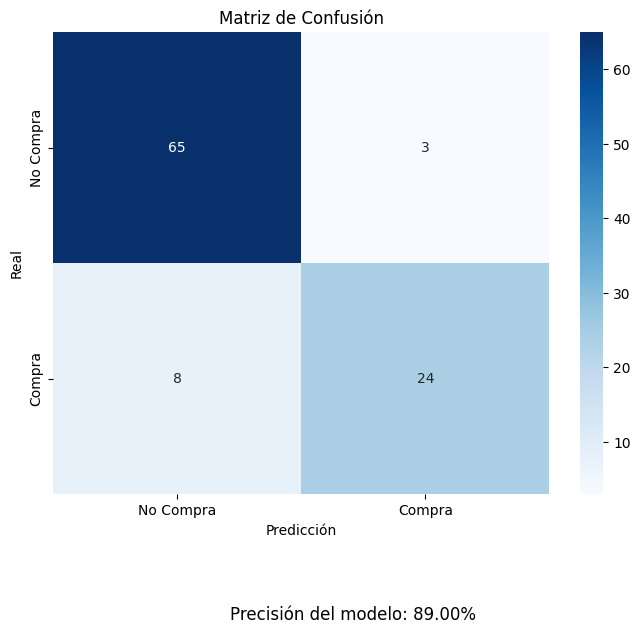

In [7]:
import matplotlib.pyplot as plt
import seaborn as sns

# Graficar la matriz de confusión usando un mapa de calor
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=['No Compra', 'Compra'], yticklabels=['No Compra', 'Compra'])
plt.xlabel('Predicción')
plt.ylabel('Real')
plt.title('Matriz de Confusión')

# Mostrar la precisión del modelo en la gráfica
plt.figtext(0.5, -0.1, f'Precisión del modelo: {accuracy * 100:.2f}%', ha='center', fontsize=12)

plt.show()